
# Introduction to Image Processing PW


In [1]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio

# Utility functions
def viewimage(im, normalise=False, MINI=0.0, MAXI=255.0):
    """
    Display the image in grayscale.
    """
    imt = np.float32(im.copy())
    if normalise:
        imt = (imt - imt.min()) * 255 / (imt.max() - imt.min())
    else:
        imt = (imt - MINI) * 255 / (MAXI - MINI)
        imt[imt < 0] = 0
        imt[imt > 255] = 255
    plt.imshow(imt, cmap='gray')
    plt.axis('off')
    plt.show()

def noise(im, br):
    """
    Add Gaussian noise to the image.
    """
    imt = np.float32(im.copy())
    bruit = br * np.random.randn(*imt.shape)
    return imt + bruit

def quantize(im, n=2):
    """
    Quantize the image into n levels.
    """
    imt = np.float32(im.copy())
    m, M = imt.min(), imt.max()
    return np.floor(n * (imt - m) / (M - m)) * (M - m) / n + m

def seuil(im, s):
    """
    Apply thresholding to the image.
    """
    return np.where(im >= s, 255, 0)

def gradx(im):
    """
    Compute the gradient of the image in the x-direction.
    """
    return np.diff(im, axis=1, append=0)

def grady(im):
    """
    Compute the gradient of the image in the y-direction.
    """
    return np.diff(im, axis=0, append=0)



## Loading Data

We start by loading an image and visualizing its basic properties such as dimensions and pixel values.


Image dimensions: (256, 256)


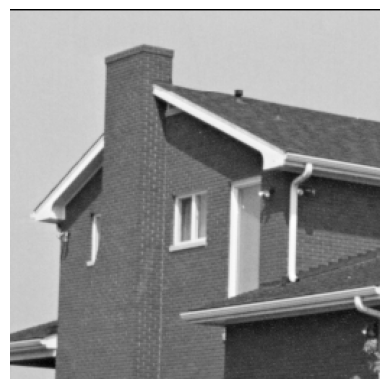

In [2]:
# Load an image
image_path = 'images/maison.tif'
im = skio.imread(image_path)

# Display the dimensions of the image
print("Image dimensions:", im.shape)

# Visualize the image
viewimage(im)


## Histograms and Statistics

In this section, we analyze the histogram of an image (simple and cumulative) to understand its intensity distribution.


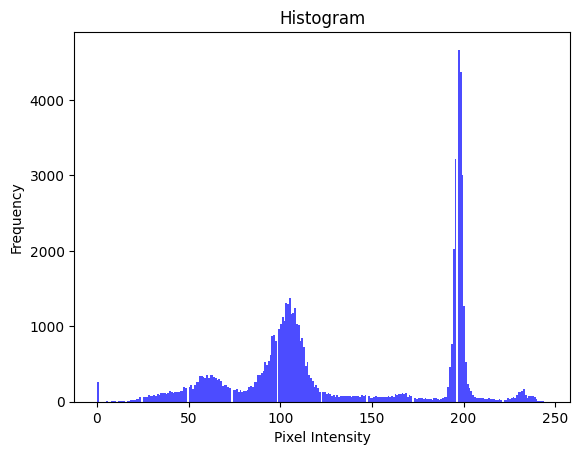

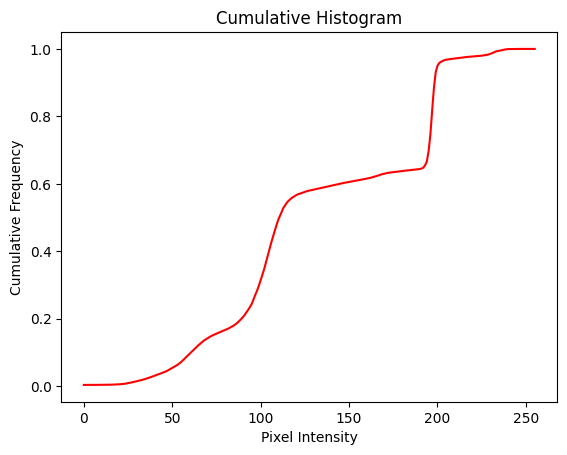

In [3]:
# Simple histogram visualization
plt.hist(im.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Cumulative histogram
histo, bins = np.histogram(im.ravel(), bins=256, range=(0, 255))
histo_cum = histo.cumsum() / histo.sum()
plt.plot(histo_cum, color='red')
plt.title("Cumulative Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")
plt.show()


## Gaussian Noise

We add gaussian noise to see the impact on the histogram.


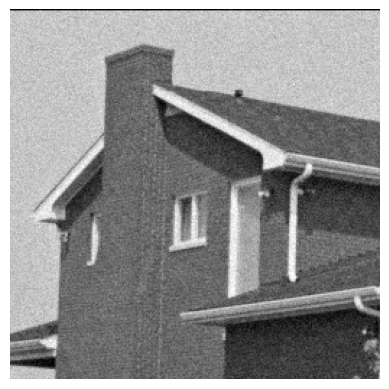

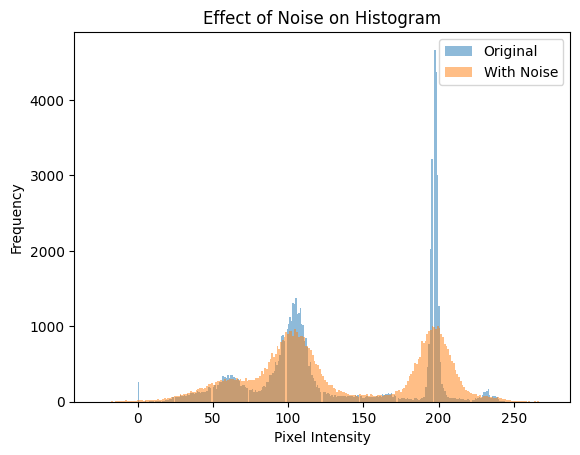

In [4]:

# Add Gaussian noise to the image
im_bruit = noise(im, 10)
viewimage(im_bruit)

# Effect on the histogram
plt.hist(im.ravel(), bins=256, alpha=0.5, label='Original')
plt.hist(im_bruit.ravel(), bins=256, alpha=0.5, label='With Noise')
plt.legend()
plt.title("Effect of Noise on Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

## Histogram Equalization
Give the same number of pixels for each grey level

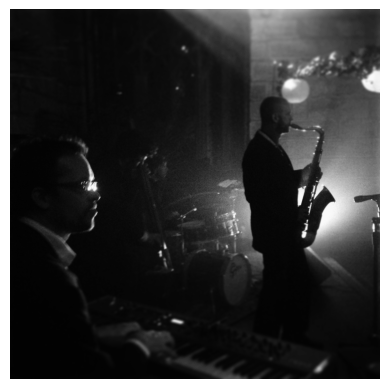

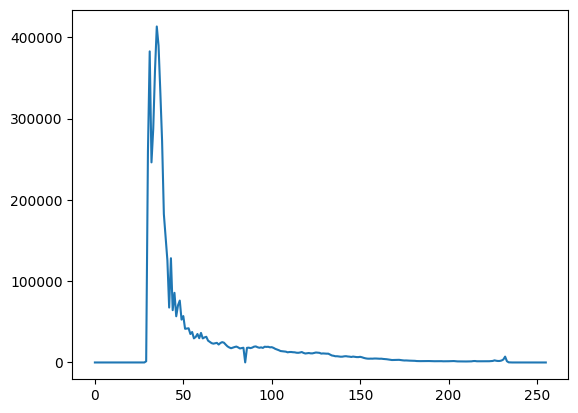

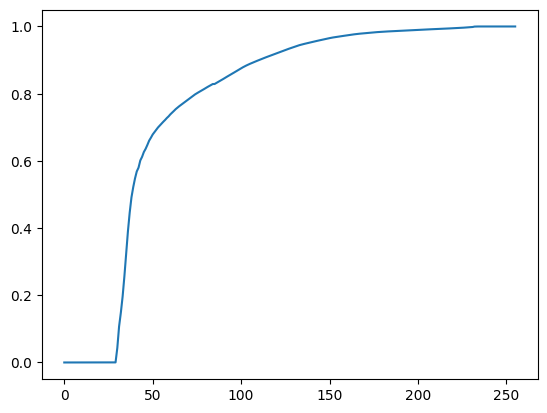

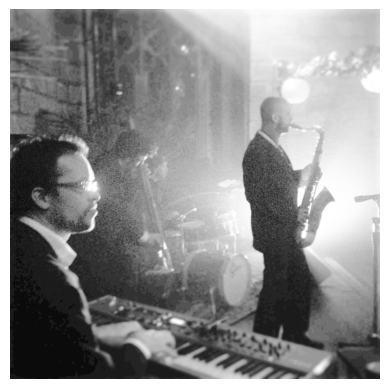

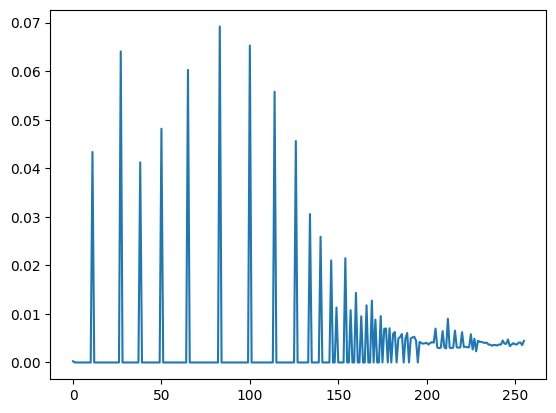

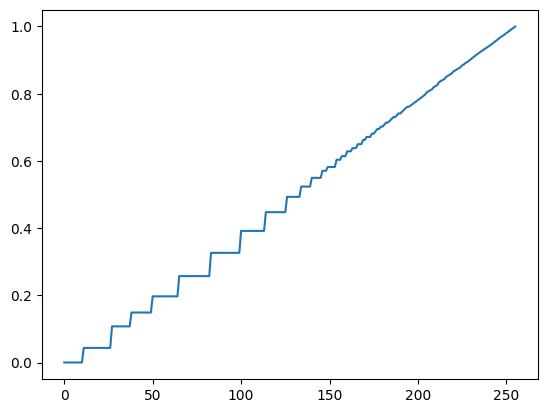

In [5]:
# Histogram equalization
image_gray = skio.imread('images/sombre.jpg').mean(axis=2)
viewimage(image_gray)

histo, bins = np.histogram(image_gray.ravel(), bins=256, range=(0, 255))
histo_cum = histo.cumsum() / histo.sum()

plt.plot(histo)
plt.show()
plt.plot(histo_cum)
plt.show()

im_equal = histo_cum[np.uint8(image_gray)]
viewimage(im_equal)

histo_equal, bins = np.histogram((im_equal*256).ravel(), bins=256, range=(0, 255))
histo_equal = histo_equal / histo_equal.sum()
histo_cum_equal = histo_equal.cumsum()

plt.plot(histo_equal)
plt.show()
plt.plot(histo_cum_equal)
plt.show()


## Histogram Prescription

Match the histogram of one image to another by sorting pixel intensities.


Image 1


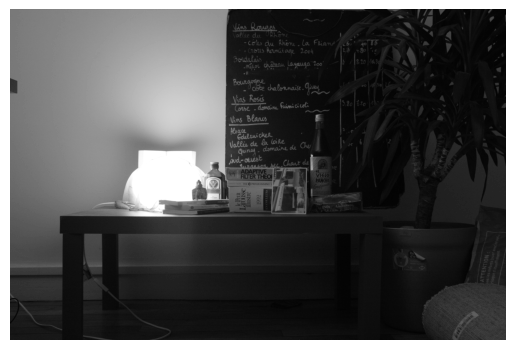

Image 2


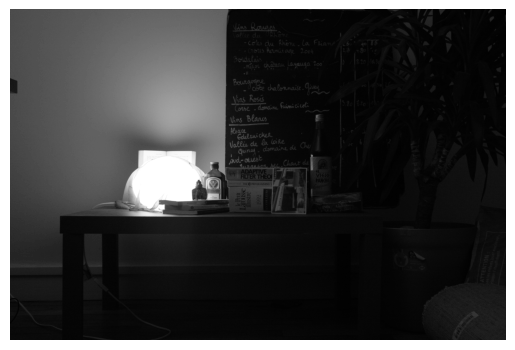

Images differences


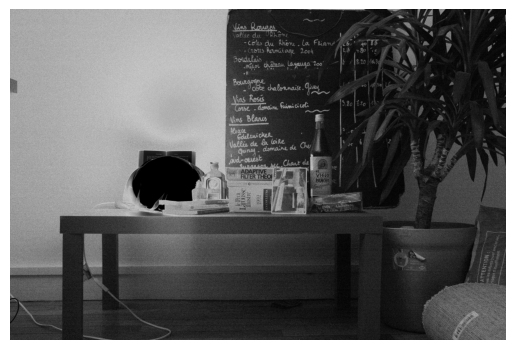

Image 1 prescripted


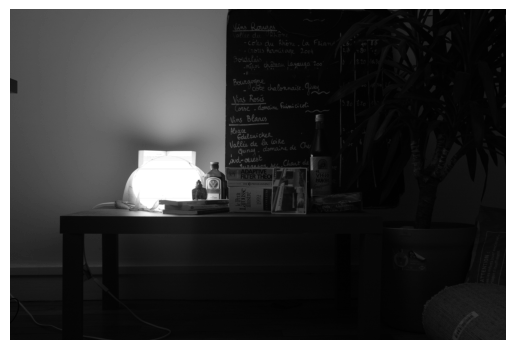

Images differences with image 1 prescripted


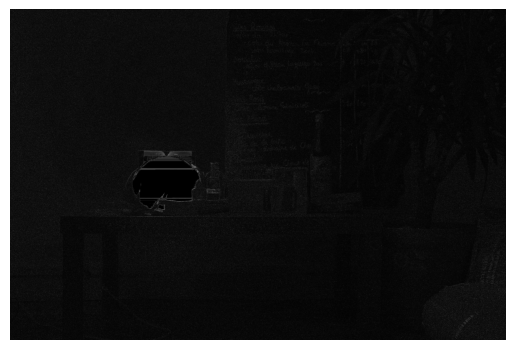

Here we can see that the noise is proportional to the irradiance


In [6]:

# Load two images
image_u = skio.imread('images/vue1.tif')
image_v = skio.imread('images/vue2.tif')

# Display original images
print('Image 1')
viewimage(image_u)
print('Image 2')
viewimage(image_v)

# Display images differences
print('Images differences')
viewimage(abs(np.float32(image_u)-np.float32(image_v)))

# Apply histogram prescription
u_shape = image_u.shape
u_flat = image_u.ravel()
v_flat = image_v.ravel()

sorted_indices = np.argsort(u_flat)
prescribed_u = np.zeros_like(u_flat)
prescribed_u[sorted_indices] = np.sort(v_flat)
prescribed_u = prescribed_u.reshape(u_shape)

# Display the result
print('Image 1 prescripted')
viewimage(prescribed_u)

# Display new differences
print('Images differences with image 1 prescripted')
viewimage(abs(np.float32(prescribed_u)-np.float32(image_v)))
print('Here we can see that the noise is proportional to the irradiance')


## Histogram Equalization with Uniform Noise

Equalize an image's histogram by matching it to uniform noise.


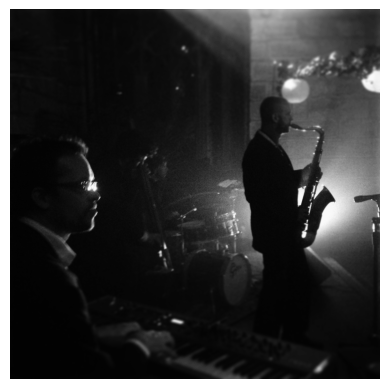

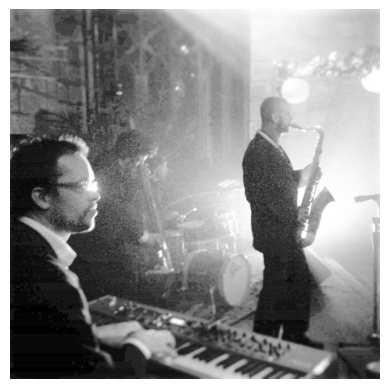

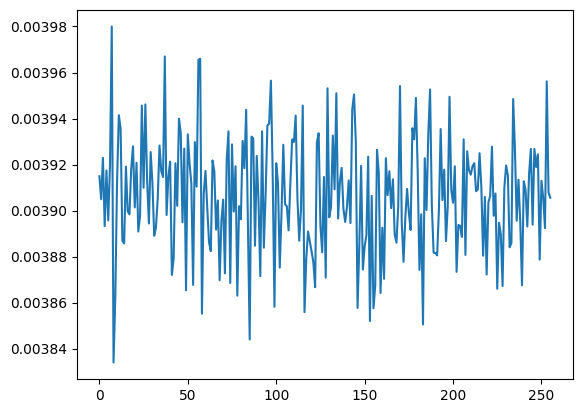

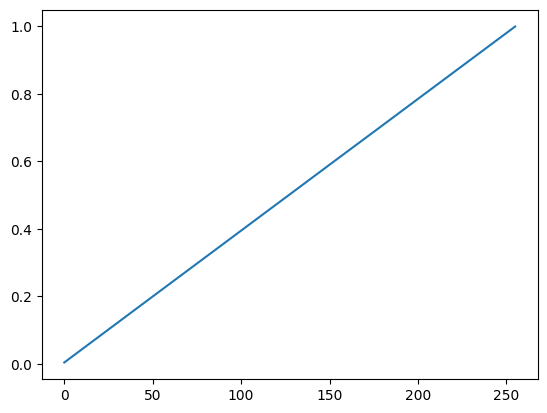

In [7]:

# Load the grayscale image
image_gray = skio.imread('images/sombre.jpg').mean(axis=2)

# Generate uniform noise
uniform_noise = np.random.uniform(0, 255, size=image_gray.shape)

# Equalize histogram using uniform noise
sorted_indices = np.argsort(image_gray.ravel())
equalized_image = np.zeros_like(image_gray.ravel())
equalized_image[sorted_indices] = np.sort(uniform_noise.ravel())
equalized_image = equalized_image.reshape(image_gray.shape)

# Display the results
viewimage(image_gray)
viewimage(equalized_image)

histo,bins = np.histogram(equalized_image.ravel(), bins=256, range=(0, 255))
histo = histo / histo.sum()
histo_cum = histo.cumsum()
plt.plot(histo)
plt.show()
plt.plot(histo_cum)
plt.show()



## Quantization

Reduce the number of intensity levels in an image.


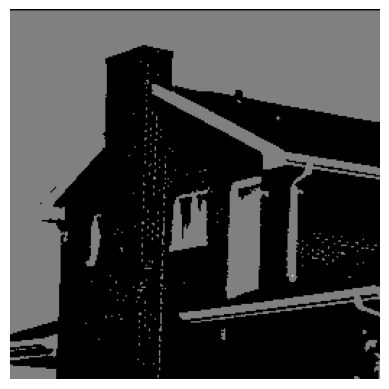

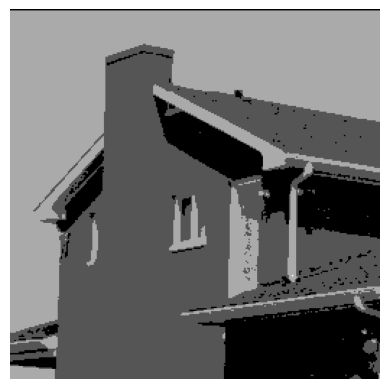

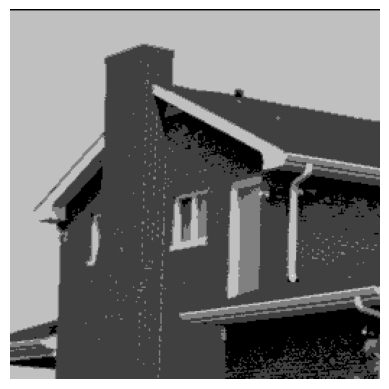

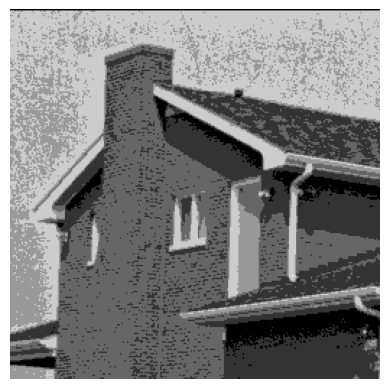

In [8]:
# Load the image
image_quant = skio.imread('images/maison.tif')

# Quantize in 2 to 5 levels
for i in range(2,6):
    viewimage(quantize(image_quant, n=i))


## Dithering

Simulate more intensity levels by adding noise before thresholding.


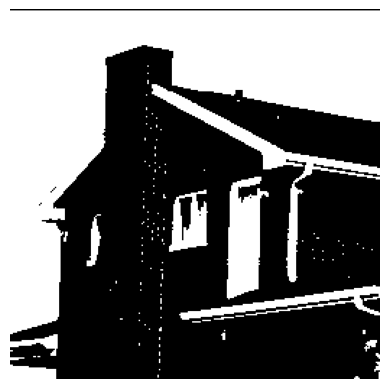

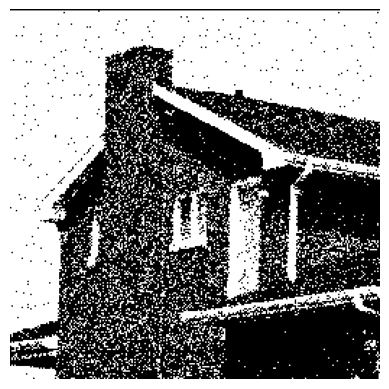

In [9]:
# Apply simple thresholding
threshold_image = seuil(image_quant, 128)

# Apply dithering (add noise before thresholding)
dithered_image = seuil(noise(image_quant, 30), 128)

# Display the results
viewimage(threshold_image)
viewimage(dithered_image)